In [1]:
import seaborn as sns
import geopandas as gpd
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

In [2]:
spark = (
 SparkSession.builder.appName("project 1 plot")
 .config("spark.sql.repl.eagerEval.enabled", True)
 .config("spark.executor.memory","4G")
 .config("spark.driver.memory","2G")
 .config("spark.sql.parquet.cacheMetadata", "true")
 .config("spark.sql.session.timeZone", "Etc/UTC")
 .config('spark.driver.maxResultSize', '2048m')
 .getOrCreate()
)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/17 12:58:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/08/17 12:58:28 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/08/17 12:58:28 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [3]:
df = pd.read_parquet('data/sample_data.parquet')

# Distribution and spread of tip amount #

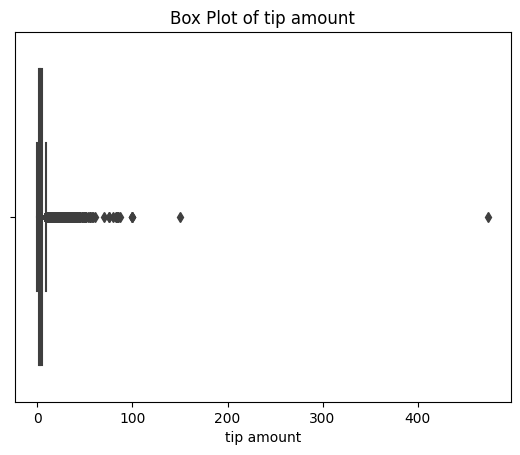

In [17]:
sns.boxplot(x=df['tip_amount'])
plt.title('Box Plot of tip amount')
plt.xlabel('tip amount')
plt.savefig('plots/box_plot_tipamount.png')
plt.show()


In [15]:
# Remove those outliers
df_remove_outliers = df[df['tip_amount'] <= 120]

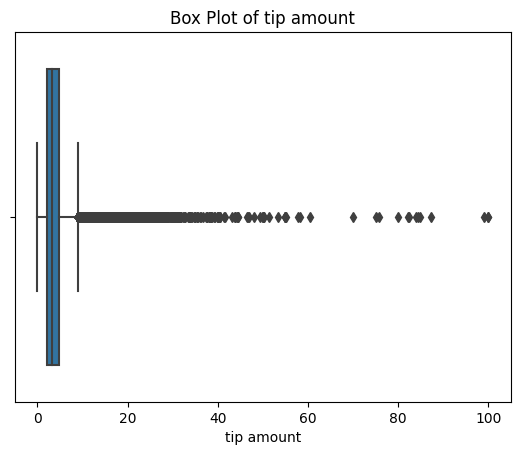

In [18]:
sns.boxplot(x=df_remove_outliers['tip_amount'])
plt.title('Box Plot of tip amount')
plt.xlabel('tip amount')
plt.savefig('plots/box_plot_tipamount_removedoutlier.png')
plt.show()


In [7]:
df_remove_outliers.to_parquet('data/sample_data_remove_outliers.parquet')

# Heat map #

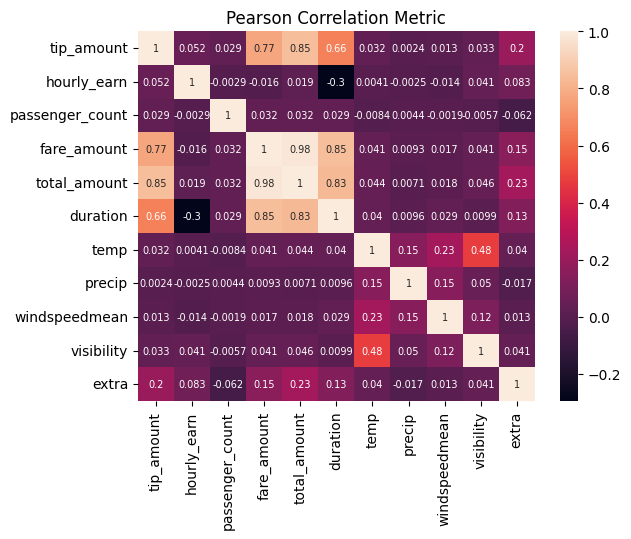

In [19]:
CORR_COLS = ['tip_amount','hourly_earn', 'passenger_count', 'fare_amount', 'total_amount','duration', 'temp', 'precip', 'windspeedmean', 'visibility', 'extra']

sns.heatmap(df_remove_outliers[CORR_COLS].corr(), annot = True, annot_kws={"size": 7})

plt.title('Pearson Correlation Metric')
plt.savefig('plots/heat_map.png')
plt.show()


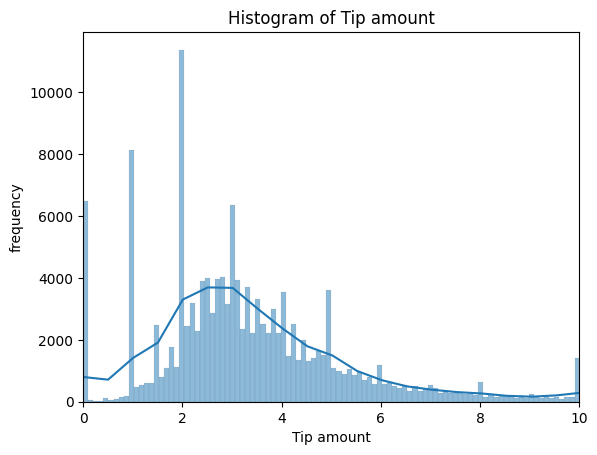

In [20]:
sns.histplot(df_remove_outliers['tip_amount'], kde=True)
plt.xlabel('Tip amount')
plt.ylabel('frequency')
plt.xlim(0, 10)
plt.title('Histogram of Tip amount')
plt.savefig('plots/tip_histogram.png')
plt.show()


/Users/chengqian/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


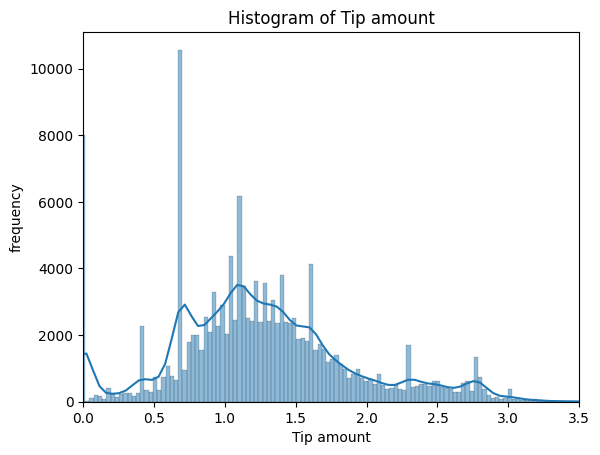

23/08/17 20:31:52 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 315173 ms exceeds timeout 120000 ms
23/08/17 20:31:52 WARN SparkContext: Killing executors is not supported by current scheduler.
23/08/17 20:31:54 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at sc

In [21]:
log_transformed_data = np.log(df_remove_outliers['tip_amount'])
sns.histplot(log_transformed_data, kde=True)
plt.xlabel('Tip amount')
plt.ylabel('frequency')
plt.xlim(0,3.5)
plt.title('Histogram of Tip amount')
plt.savefig('plots/log_tip_histogram.png')
plt.show()
